In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import json
import os

import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package punkt to /home/khoa-ys/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/khoa-
[nltk_data]     ys/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/khoa-ys/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/khoa-ys/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/khoa-ys/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
path = Path('/home/khoa-ys/Projects/NLP Project')
data_path = path/'data'
os.listdir(data_path)

['spam_sport.csv',
 'text_sports.csv',
 'Home_and_Kitchen.json',
 'models',
 'spam_sports.csv_tok',
 'spam_sports.csv',
 'Sports_and_Outdoors.csv',
 'Sports_and_Outdoors extra.json',
 'Sports_and_Outdoors extra.csv',
 'Sports_and_Outdoors.json',
 'text_sports_balanced.csv',
 '.ipynb_checkpoints',
 'text_sports_test.csv',
 'spam_sports_test.csv',
 'spam_sports_balanced.csv']

# Retrieve only text data

In [3]:
data = pd.read_csv(data_path/'Sports_and_Outdoors.csv', index_col='_id').drop('Unnamed: 0', axis=1)
data

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,class
_id,,,,,,,,,,,
5a132768741a2384e847b8ed,A2PAVURT4NOHE1,0000031852,Leah,"[0, 0]",Bought it for a ballet tutu but it is being wo...,5.0,Super cute,1388361600,"12 30, 2013",Sports_and_Outdoors,1.0
5a132768741a2384e847b8e9,A1SNLWGLFXD70K,0000031852,DEVA,"[0, 0]",I origonally didn't get the item I ordered. W...,4.0,Happy with purchase even though it came a lot ...,1392940800,"02 21, 2014",Sports_and_Outdoors,1.0
5a132768741a2384e847b8ee,A3URQ0LXLV46E9,0000031852,shortyvee,"[0, 0]",My daughter and her friends love the colors an...,4.0,zebralisous,1400544000,"05 20, 2014",Sports_and_Outdoors,1.0
5a132768741a2384e847b8ea,A1KJ4CVG87QW09,0000031852,Donna Carter-Scott,"[0, 0]","Arrived very timely, cute grandbaby loves it. ...",4.0,Cute Tutu,1389657600,"01 14, 2014",Sports_and_Outdoors,1.0
5a132768741a2384e847b8eb,AA9ITO6ZLZW6,0000031852,Jazzy77,"[0, 0]",My little girl just loves to wear this tutu be...,5.0,Versatile,1399507200,"05 8, 2014",Sports_and_Outdoors,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5a1327fe741a2384e879a60d,A1XNL3C5RL8AC,B00LVHLRZ8,Michael Allen Bright,"[0, 0]",This only took 2 days to receive and the cord ...,5.0,Great product.,1405382400,"07 15, 2014",Sports_and_Outdoors,1.0
5a1327fe741a2384e879a60e,A1BV7953RLM07E,B00LVHLRZ8,Shen,"[0, 0]",Bought this item for travel use and so far it ...,5.0,One of the best Paracord I've used,1405382400,"07 15, 2014",Sports_and_Outdoors,1.0
5a1327fe741a2384e879a60f,A1ZUS94QF43DAC,B00LVHLRZ8,Sidney Ronson,"[0, 0]",Wasn't expecting this Paracord to be as Vibran...,5.0,Great Strong Paracord!,1405641600,"07 18, 2014",Sports_and_Outdoors,1.0


In [4]:
text_data = data[['summary', 'reviewText', 'overall', 'class', 'category']]
test_data = text_data.dropna(axis = 0)
text_data['Text'] = data['summary'] + ". " + data['reviewText']
text_data = text_data[['Text', 'overall', 'category', 'class']]
text_data

/tmp/ipykernel_13706/4097040827.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['Text'] = data['summary'] + ". " + data['reviewText']


,Text,overall,category,class
_id,,,,
5a132768741a2384e847b8ed,Super cute. Bought it for a ballet tutu but it...,5.0,Sports_and_Outdoors,1.0
5a132768741a2384e847b8e9,Happy with purchase even though it came a lot ...,4.0,Sports_and_Outdoors,1.0
5a132768741a2384e847b8ee,zebralisous. My daughter and her friends love ...,4.0,Sports_and_Outdoors,1.0
5a132768741a2384e847b8ea,"Cute Tutu. Arrived very timely, cute grandbaby...",4.0,Sports_and_Outdoors,1.0
5a132768741a2384e847b8eb,Versatile. My little girl just loves to wear t...,5.0,Sports_and_Outdoors,1.0
...,...,...,...,...
5a1327fe741a2384e879a60d,Great product.. This only took 2 days to recei...,5.0,Sports_and_Outdoors,1.0
5a1327fe741a2384e879a60e,One of the best Paracord I've used. Bought thi...,5.0,Sports_and_Outdoors,1.0
5a1327fe741a2384e879a60f,Great Strong Paracord!. Wasn't expecting this ...,5.0,Sports_and_Outdoors,1.0


#### Add extra data

In [5]:
extra_data = pd.read_csv(data_path/'Sports_and_Outdoors extra.csv').drop('Unnamed: 0', axis=1)
extra_data['category'] = 'Sports_and_Outdoors'
extra_data['class'] = 0.0
extra_data['Text'] = extra_data['summary'] + ". " + extra_data['reviewText']
extra_data = extra_data[['Text', 'overall', 'category', 'class']]
extra_data = extra_data.dropna()
extra_data

,Text,overall,category,class
0,Neon Blue Tutu. It was as described and fit my...,5.0,Sports_and_Outdoors,0.0
1,loved it!. very cute and went great with my Ha...,4.0,Sports_and_Outdoors,0.0
2,One Star. This item is very cheaply made and n...,1.0,Sports_and_Outdoors,0.0
3,Five Stars. cute,5.0,Sports_and_Outdoors,0.0
4,Smelly !. Not as full as the picture suggests ...,1.0,Sports_and_Outdoors,0.0
...,...,...,...,...
12980832,"Works sometimes. It works good, but about half...",3.0,Sports_and_Outdoors,0.0
12980833,"Decent but flawed. Works well, however prone t...",4.0,Sports_and_Outdoors,0.0
12980834,Five Stars. Works great,5.0,Sports_and_Outdoors,0.0
12980835,Works like a charm. Works like a charm. Easy t...,5.0,Sports_and_Outdoors,0.0


In [6]:
data = pd.concat([text_data.reset_index(drop=True), extra_data.iloc[:2000000]], ignore_index=True)
data

,Text,overall,category,class
0,Super cute. Bought it for a ballet tutu but it...,5.0,Sports_and_Outdoors,1.0
1,Happy with purchase even though it came a lot ...,4.0,Sports_and_Outdoors,1.0
2,zebralisous. My daughter and her friends love ...,4.0,Sports_and_Outdoors,1.0
3,"Cute Tutu. Arrived very timely, cute grandbaby...",4.0,Sports_and_Outdoors,1.0
4,Versatile. My little girl just loves to wear t...,5.0,Sports_and_Outdoors,1.0
...,...,...,...,...
5013251,Great Knife. If you were to take one knife wit...,5.0,Sports_and_Outdoors,0.0
5013252,"Elegant, tough and useful. The Fallkniven A1 i...",5.0,Sports_and_Outdoors,0.0
5013253,Perfect knife. This knife is beautiful! I just...,5.0,Sports_and_Outdoors,0.0
5013254,The Real Deal. This is a REAL survival knife!\...,5.0,Sports_and_Outdoors,0.0


<AxesSubplot:>

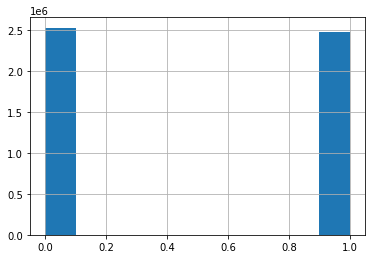

In [7]:
data['class'].hist()

### Concatenate summary with reviewText and split train, test set

In [8]:
X = data[['Text', 'overall', 'category']]
y = data['class'] #define feature matrix X and labels y 
X_rem, X_sample, y_rem, y_sample = train_test_split(X, y, test_size = 0.005, shuffle = True, stratify=y, random_state = 1234) 
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size = 0.3, random_state = 1234) #split data 70:30

In [9]:
text_data = pd.DataFrame(X_train)
text_data['class'] = y_train
text_data = text_data.reset_index(drop=True)
text_data

,Text,overall,category,class
0,... that they might have been used as they wer...,4.0,Sports_and_Outdoors,0.0
1,Accurate Shot!. If you like Old school Iron si...,4.0,Sports_and_Outdoors,1.0
2,Great present. My niece just loves this. She r...,5.0,Sports_and_Outdoors,1.0
3,Great watch. Very nice Seiko watch with easy t...,5.0,Sports_and_Outdoors,1.0
4,"Safe Wading, Value Priced, comfortable. Used t...",5.0,Sports_and_Outdoors,1.0
...,...,...,...,...
17541,Can reach hard to clean spots. Fabulous brush ...,4.0,Sports_and_Outdoors,1.0
17542,Works great.. This item works great for pitche...,5.0,Sports_and_Outdoors,1.0
17543,not bad for the price. they only came in one s...,3.0,Sports_and_Outdoors,0.0
17544,Five Stars. Very big. Well worth the money,5.0,Sports_and_Outdoors,0.0


<AxesSubplot:>

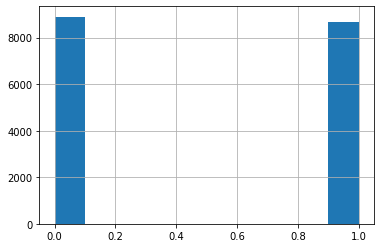

In [10]:
text_data['class'].hist()

### Lowercasing and lemmatizing

In [11]:
#Helper function to get lemmatizer to return the original word form
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"V": wordnet.VERB,
                "N": wordnet.NOUN,
                "J": wordnet.ADJ,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize(raw_string):
    string = re.sub(r"'\w?", " ", raw_string)
    string = re.sub(r"[^a-zA-Z \-]", " ", string)
    #tokenize words
    word_tokens = word_tokenize(string)
    #remove stopwords
    stop_words = set(stopwords.words('english') + ['-', 'us'])
    filtered_tokens = [word.lower() for word in word_tokens if not word.lower() in stop_words]
    #stem the remaining words
    lemmatizer = WordNetLemmatizer()
    stemmed_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in filtered_tokens]
    stemmed_string = " ".join(stemmed_tokens)
    #print(stemmed_string)
    return stemmed_string

In [12]:
text_data['Processed Text'] = text_data['Text'].map(lambda raw_string : lemmatize(str(raw_string)))
text_data = text_data[['Text', 'Processed Text', 'overall', 'category', 'class']]
text_data

,Text,Processed Text,overall,category,class
0,... that they might have been used as they wer...,might use dirty rust real alice clip appear mi...,4.0,Sports_and_Outdoors,0.0
1,Accurate Shot!. If you like Old school Iron si...,accurate shot like old school iron site remova...,4.0,Sports_and_Outdoors,1.0
2,Great present. My niece just loves this. She r...,great present niece love ride ride come assemb...,5.0,Sports_and_Outdoors,1.0
3,Great watch. Very nice Seiko watch with easy t...,great watch nice seiko watch easy read day dat...,5.0,Sports_and_Outdoors,1.0
4,"Safe Wading, Value Priced, comfortable. Used t...",safe wad value price comfortable use wad boot ...,5.0,Sports_and_Outdoors,1.0
...,...,...,...,...,...
17541,Can reach hard to clean spots. Fabulous brush ...,reach hard clean spot fabulous brush set get p...,4.0,Sports_and_Outdoors,1.0
17542,Works great.. This item works great for pitche...,work great item work great pitcher purchase so...,5.0,Sports_and_Outdoors,1.0
17543,not bad for the price. they only came in one s...,bad price come one size unfortunately need big...,3.0,Sports_and_Outdoors,0.0
17544,Five Stars. Very big. Well worth the money,five star big well worth money,5.0,Sports_and_Outdoors,0.0


### Save data as new files

In [13]:
text_data.to_csv(data_path/'text_sports.csv')
text_data[['Processed Text', 'class']].to_csv(data_path/'spam_sports.csv', index=False)

In [14]:
pd.isna(text_data).sum()

Text              0
Processed Text    0
overall           0
category          0
class             0
dtype: int64

In [15]:
pd.isna(text_data[['Processed Text', 'class']]).sum()

Processed Text    0
class             0
dtype: int64

In [17]:
text_data = pd.DataFrame(X_test)
text_data['class'] = y_test
text_data = text_data.reset_index(drop=True)
text_data
text_data['Processed Text'] = text_data['Text'].map(lambda raw_string : lemmatize(str(raw_string)))
text_data = text_data[['Text', 'Processed Text', 'overall', 'category', 'class']]
text_data.to_csv(data_path/'text_sports_test.csv')
text_data[['Processed Text', 'class']].to_csv(data_path/'spam_sports_test.csv', index=False)

### Sample by hand to rebalance classes

In [ ]:
class_0 = text_data[text_data['class']==0.]
print(len(class_0))
class_1 = text_data[text_data['class']==1.]
print(len(class_1))
class_1 = class_1.sample(n = len(class_0))
class_1

In [ ]:
balanced_data = pd.concat((class_0, class_1)).reset_index(drop=True)
balanced_data.to_csv(data_path/'text_sports_balanced.csv')
balanced_data[['Processed Text', 'class']].to_csv(data_path/'spam_sports_balanced.csv', index=False)
balanced_data['class'].hist()